In [5]:
%matplotlib inline
import pandas as pd

In [6]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [7]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


In [8]:
release_dates = pd.DataFrame.from_csv('data/release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
3,#Horror,2015,USA,2015-11-20
4,#Horror,2015,UK,2016-05-16


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

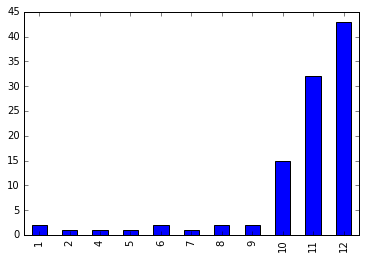

In [72]:
r = release_dates
r1 = r[r.title.str.contains("Christmas")]
r1 = r1[r1.country == 'USA']
r1.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

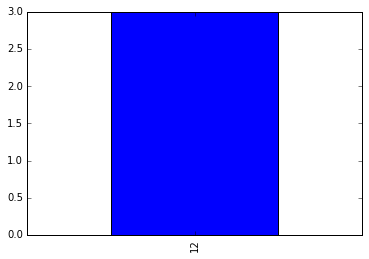

In [49]:
h = r[r.title.str.startswith('The Hobbit')]
h = h[h.country == 'USA']
h.date.dt.month.value_counts().plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

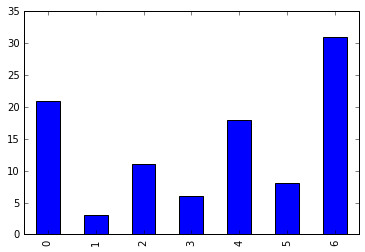

In [55]:
hq = r[r.title.str.contains('Romance')]
hq = hq[hq.country == 'USA']
hq.date.dt.dayofweek.value_counts().sort_index().plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

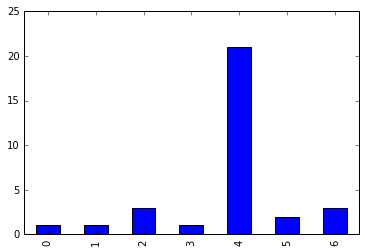

In [56]:
hz = r[r.title.str.contains('Action')]
hz = hz[hz.country == 'USA']
hz.date.dt.dayofweek.value_counts().sort_index().plot(kind='bar')

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [74]:
judi = cast[(cast.name == 'Judi Dench') & (cast.year >= 1990) & (cast.year <= 1999)]

In [80]:
usa = release_dates[release_dates.country == 'USA']

In [78]:
judi

,title,year,name,type,character,n
2661768,GoldenEye,1995,Judi Dench,actress,M,6.0
2661769,Hamlet,1996,Judi Dench,actress,Hecuba,12.0
2661775,Jack & Sarah,1995,Judi Dench,actress,Margaret,3.0
2661781,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1.0
2661793,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12.0
2661797,Tea with Mussolini,1999,Judi Dench,actress,Arabella,2.0
2661805,The World Is Not Enough,1999,Judi Dench,actress,M,6.0
2661806,Tomorrow Never Dies,1997,Judi Dench,actress,M,9.0


In [83]:
j = judi.merge(usa)
j

,title,year,name,type,character,n,country,date
0,GoldenEye,1995,Judi Dench,actress,M,6.0,USA,1995-11-17
1,Hamlet,1996,Judi Dench,actress,Hecuba,12.0,USA,1996-12-25
2,Jack & Sarah,1995,Judi Dench,actress,Margaret,3.0,USA,1996-03-22
3,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1.0,USA,1997-10-03
4,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12.0,USA,1999-01-08
5,Tea with Mussolini,1999,Judi Dench,actress,Arabella,2.0,USA,1999-05-14
6,The World Is Not Enough,1999,Judi Dench,actress,M,6.0,USA,1999-11-19
7,Tomorrow Never Dies,1997,Judi Dench,actress,M,9.0,USA,1997-12-19


### In which months do films with Judi Dench tend to be released in the USA?

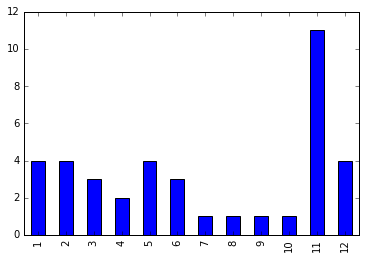

In [93]:
judi1 = cast[(cast.name == 'Judi Dench')]
j1 = judi1.merge(usa)
j1.date.dt.month.value_counts().sort_index().plot(kind='bar')

### In which months do films with Tom Cruise tend to be released in the USA?

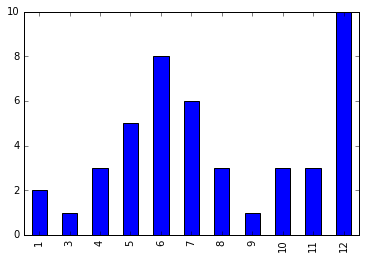

In [98]:
tom = cast[cast.name == 'Tom Cruise']
tommy = tom.merge(usa)
tommy.date.dt.month.value_counts().sort_index().plot(kind='bar')